In [1]:
# 1. Get essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from vnstock import *

Observations:  1635


<Axes: xlabel='Time'>

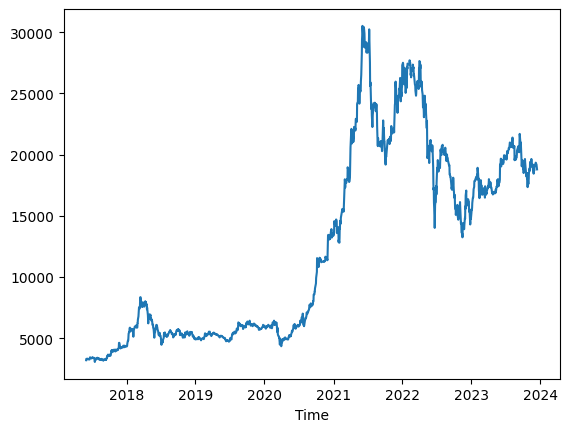

In [2]:
#2. Fetch data and visualize
VIB = stock_historical_data(symbol = "VIB", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(VIB['Close']))
VIB
VIB["Close"].plot()

In [3]:
# Preprocessing
df = VIB['Close']
df=df.reset_index()
df['Lag1'] = range(0, 1635)
df['Lag2'] = df['Lag1'].shift(1)
df['Lag3'] = df['Lag2'].shift(1)
df = df.dropna()
df

,Time,Close,Lag1,Lag2,Lag3
2,2017-06-05,3290,2,1.0,0.0
3,2017-06-06,3320,3,2.0,1.0
4,2017-06-07,3340,4,3.0,2.0
5,2017-06-08,3310,5,4.0,3.0
6,2017-06-09,3290,6,5.0,4.0
...,...,...,...,...,...
1630,2023-12-11,19200,1630,1629.0,1628.0
1631,2023-12-12,19200,1631,1630.0,1629.0
1632,2023-12-13,19050,1632,1631.0,1630.0
1633,2023-12-14,18900,1633,1632.0,1631.0


In [4]:
#3. Slit the data into train : test with ratio 8:2
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [5]:
#4. Training process
x_train = np.array([train_data['Lag1'],train_data['Lag2'], train_data['Lag3']]).reshape(-1, 3)
y_train = np.array(train_data['Close'])

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
# 5. Testing process
x_test = np.array([test_data['Lag1'],test_data['Lag2'], test_data['Lag3']]).reshape(-1, 3)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)
y_pred

array([13534.26725134, 13555.95384296, 13577.64043458, 13599.32702621,
       13621.01361783, 13642.70020945, 13664.38680107, 13686.0733927 ,
       13707.75998432, 13729.44657594, 13751.13316756, 13772.81975919,
       13794.50635081, 13816.19294243, 13837.87953405, 13859.56612568,
       13881.2527173 , 13902.93930892, 13924.62590054, 13946.31249217,
       13967.99908379, 13989.68567541, 14011.37226703, 14033.05885866,
       14054.74545028, 14076.4320419 , 14098.11863352, 14119.80522515,
       14141.49181677, 14163.17840839, 14184.86500001, 14206.55159163,
       14228.23818326, 14249.92477488, 14271.6113665 , 14293.29795812,
       14314.98454975, 14336.67114137, 14358.35773299, 14380.04432461,
       14401.73091624, 14423.41750786, 14445.10409948, 14466.7906911 ,
       14488.47728273, 14510.16387435, 14531.85046597, 14553.53705759,
       14575.22364922, 14596.91024084, 14618.59683246, 14640.28342408,
       14661.97001571, 14683.65660733, 14705.34319895, 14727.02979057,
      

In [7]:
# 6. 60 days prediction
last_index =  len(df)
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)
range_arr_1 = np.array(range(last_index+1, last_index+61))
range_arr_2 = np.array(range(last_index, last_index+60))
range_arr_3 = np.array(range(last_index-1, last_index+59))

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array([range_arr_1,
                          range_arr_2,
                          range_arr_3]).reshape(-1, 3)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[17069.1816858  17090.86827742 17112.55486904 17134.24146067
 17155.92805229 17177.61464391 17199.30123553 17220.98782716
 17242.67441878 17264.3610104  17286.04760202 17307.73419365
 17329.42078527 17351.10737689 17372.79396851 17394.48056014
 17416.16715176 17437.85374338 17459.540335   17481.22692663
 17061.95282192 17083.63941355 17105.32600517 17127.01259679
 17148.69918841 17170.38578004 17192.07237166 17213.75896328
 17235.4455549  17257.13214653 17278.81873815 17300.50532977
 17322.19192139 17343.87851302 17365.56510464 17387.25169626
 17408.93828788 17430.62487951 17452.31147113 17473.99806275
 17054.72395805 17076.41054967 17098.0971413  17119.78373292
 17141.47032454 17163.15691616 17184.84350778 17206.53009941
 17228.21669103 17249.90328265 17271.58987427 17293.2764659
 17314.96305752 17336.64964914 17358.33624076 17380.02283239
 17401.70942401 17423.39601563 17445.08260725 17466.76919888]


In [10]:
# 7. Evaluation
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

def MSLE (pred, actual):
    return np.mean((np.log(1+actual)-np.log(1+pred))*(np.log(1+actual)-np.log(1+pred)))
print("MSLR: ", MSLE(y_pred, y_test))

Testing RMSE: 5714.0619064870825
Testing MAPE: 19.889278770266568
Testing MAE: 4325.667356752388
MSLR:  0.09177730407258854


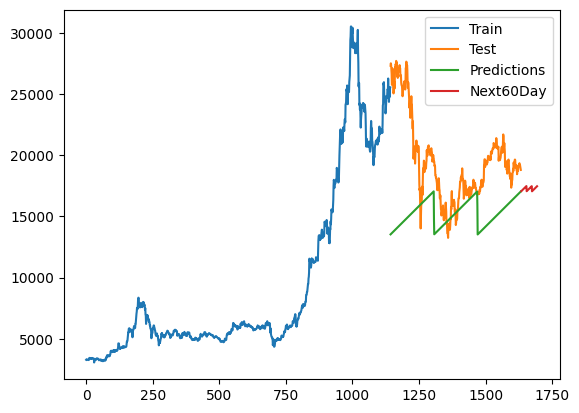

In [9]:
train_range = range(train_size)
test_range = range(train_size, train_size+test_size+1)

# 8.Visualize the result
plt.plot(train_range, train_data['Close'])
plt.plot(test_range, test_data['Close'])
plt.plot(test_range, y_pred)
plt.plot(range_arr_1,y_next_60_days)
plt.legend(['Train', 'Test','Predictions', 'Next60Day'])
plt.show()